In [1]:
%matplotlib widget
from easydynamics.analysis import Analysis

import numpy as np

from easydynamics.sample import GaussianComponent
from easydynamics.sample import LorentzianComponent
from easydynamics.sample import PolynomialComponent
from easydynamics.sample import SampleModel
from easydynamics.sample import DeltaFunctionComponent

from easydynamics.experiment  import Experiment

import matplotlib.pyplot as plt


from easydynamics.job import Job
from easydynamics.experiment  import Data


In [ ]:
MyJob= Job(name='Vanadium sample')

theory= SampleModel('Vanadium Model')
theory.add_component(GaussianComponent(width=0.5e-3,area=5e-5))
theory.add_component(LorentzianComponent(width=2e-3, area=2e-6))

MyJob.set_theory(theory)

experiment=Experiment('Vanadium Experiment')

background=SampleModel('Vanadium Background')
background.add_component(PolynomialComponent(coefficients=[1e-3]))

experiment.set_background_model(background)

experiment.set_resolution_model(None)


data=Data('Vanadium Data')
data.append(data.load_example_vanadium_data_1d())

experiment.set_data(data)

MyJob.set_experiment(experiment)


analysis=Analysis('Vanadium Analysis')

MyJob.set_analysis(analysis)

ValueError: Component with name 'Gaussian' already exists.

In [3]:
MyJob.fit()

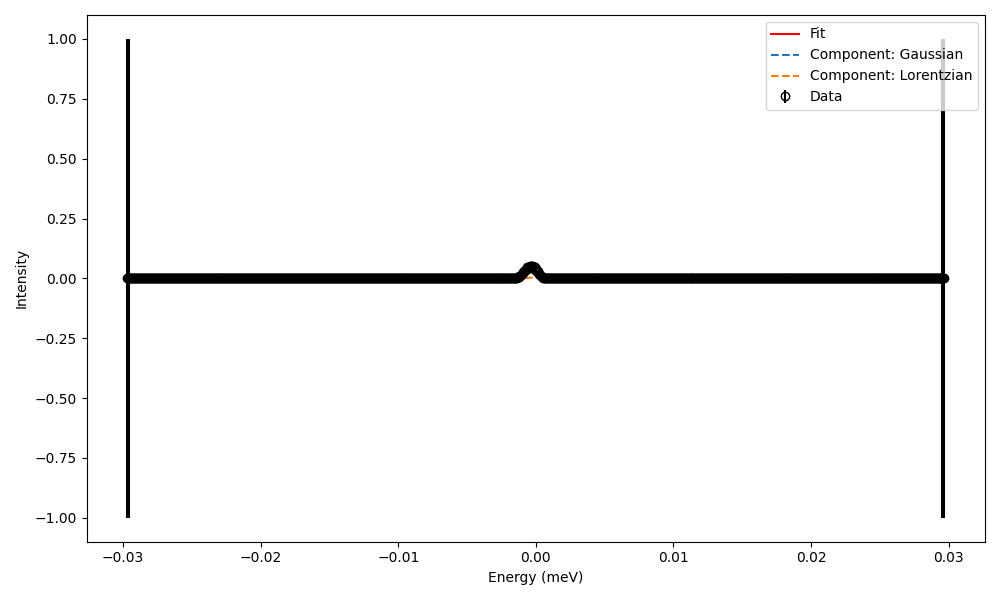

(0.0, 0.07)

In [4]:
fig=MyJob.analysis.plot_data_and_model(plot_individual_components=True)

fig.axes[0].set_xlim(-0.02, 0.02)
fig.axes[0].set_ylim(0, 0.07)

In [5]:
pars=MyJob.analysis.get_parameters()
pars

[<Parameter 'temperature': -1.0000 K (fixed), bounds=[-inf:inf]>,
 <Parameter 'Gaussianarea': 0.0001 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'Gaussiancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Gaussianwidth': 0.0004 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'Lorentzianarea': 0.0000 ± 0.0000 meV, bounds=[0.0:inf]>,
 <Parameter 'Lorentziancenter': 0.0000 meV (fixed), bounds=[-inf:inf]>,
 <Parameter 'Lorentzianwidth': 0.0005 ± 0.0004 meV, bounds=[0.0:inf]>,
 <Parameter 'temperature': -1.0000 K (fixed), bounds=[-inf:inf]>,
 <Parameter 'Polynomial_c0': 0.0002 ± 0.0000, bounds=[-inf:inf]>,
 <Parameter 'offset': -0.0004 ± 0.0000 meV, bounds=[-inf:inf]>]

In [6]:
DataJob= Job(name='Sample')

Newtheory= SampleModel('Model')
Newtheory.add_component(DeltaFunctionComponent(area=0.01e-3))
Newtheory.add_component(LorentzianComponent(width=2e-3, area=5e-6))

DataJob.set_theory(Newtheory)

Newexperiment=Experiment('Experiment')

Newbackground=SampleModel('Background')
Newbackground.add_component(PolynomialComponent(coefficients=[1e-3]))

Newexperiment.set_background_model(Newbackground)

res=SampleModel('Resolution')

theory_width=pars[2].value
theory_area=pars[0].value
theory_G=GaussianComponent(width=theory_width, area=theory_area)
theory_G.area.fixed=True
theory_G.width.fixed=True
theory_width=pars[5].value
theory_area=pars[3].value
theory_L=LorentzianComponent(width=theory_width, area=theory_area)
theory_L.area.fixed=True
theory_L.width.fixed=True

res.add_component(theory_G)
res.add_component(theory_L)
                  

Newexperiment.set_resolution_model(res)


newdata=Data('Data')
newdata.append(newdata.load_example_data_1d())

Newexperiment.set_data(newdata)

DataJob.set_experiment(Newexperiment)


analysis=Analysis('Analysis')

DataJob.set_analysis(analysis)



ValueError: value=np.float64(-1.0) can not be less than min=0.0

In [ ]:
pars2=DataJob.analysis.get_parameters()
pars2

In [ ]:
pars2[3].value

In [ ]:
fig=DataJob.analysis.plot_data_and_model(plot_individual_components=True)

# # Extract data
# x, y, e = DataJob.analysis._experiment.extract_xye_data(DataJob.analysis._experiment._data)

# # Start plot
# fig = plt.figure(figsize=(10, 6))
# # plt.errorbar(x, y, yerr=e, label='Data', color='black', marker='o', linestyle='None', markerfacecolor='none')

# # Compute and plot fit
# fit_y = DataJob.analysis.calculate_theory(x)
# plt.plot(x, fit_y, label='Fit', color='red')



fig.axes[0].set_xlim(-0.02, 0.02)
fig.axes[0].set_ylim(0, 0.015)

In [ ]:
DataJob.fit()
fig=DataJob.analysis.plot_data_and_model(plot_individual_components=True)

fig.axes[0].set_xlim(-0.02, 0.02)
fig.axes[0].set_ylim(0, 0.015)

In [ ]:
DataJob.analysis.get_fit_parameters()

In [ ]:
DataJob.analysis.get_parameters()